In [1]:
import pandas as pd

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')	# sep means this dataset is seperated by ";"

# Explore dataset
data.head()# Display first 5 rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [2]:
#checking missing values
print("Missing Values:\n",data.isnull().sum())

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [3]:
#normalize numarical features
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
data.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1]) #fit refer to compute min max #-1 means drop the tgarget value and compute (target value means the last column which means in this quality) #then second transform and re write

In [4]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [5]:
#split dataset into features (X) and Target (y)
X=data.iloc[:,:-1].values #All colums except last row
y=data.iloc[:,-1].values # last column (Wine Quality)

In [6]:
#convert target variable into categorical labels
lb=LabelBinarizer()
y=lb.fit_transform(y)

In [7]:
#split into training and test tests
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #0.2 means 20%

In [8]:
#Define the deep learning model
model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(len(lb.classes_),activation='softmax') #softmax is used to output layer for  multi-class classification
])

#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,046 (11.90 KB)

 Trainable params: 3,046 (11.90 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3968 - loss: 1.6570 - val_accuracy: 0.4023 - val_loss: 1.3252
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4549 - loss: 1.2732 - val_accuracy: 0.5391 - val_loss: 1.1332
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4784 - loss: 1.1485 - val_accuracy: 0.5430 - val_loss: 1.0880
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4952 - loss: 1.1513 - val_accuracy: 0.6250 - val_loss: 1.0334
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5278 - loss: 1.0924 - val_accuracy: 0.6211 - val_loss: 1.0035
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5668 - loss: 1.0566 - val_accuracy: 0.6133 - val_loss: 0.9713
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5496 - loss: 1.0516 - val_accuracy: 0.6484 - val_loss: 0.9374
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5782 - loss: 1.0163 - val_accuracy: 0.6133 - val_loss

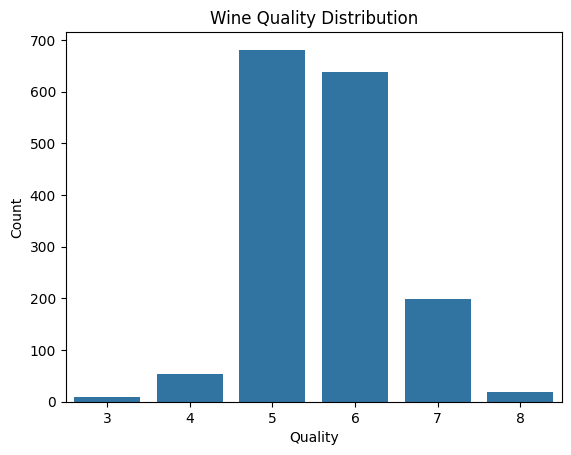

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#Display distribution of wine quality
sns.countplot(data=data,x='quality')
plt.title("Wine Quality Distribution")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

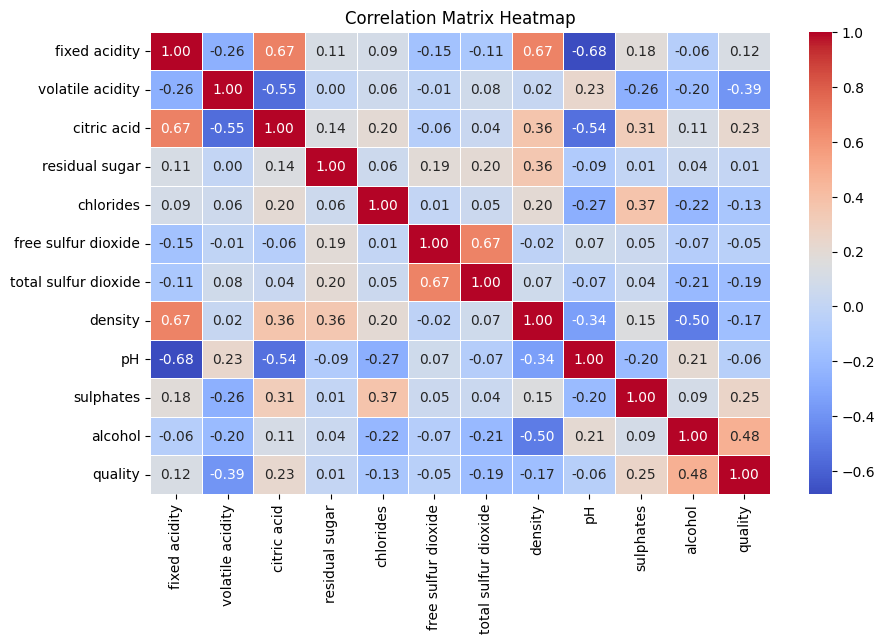

In [11]:
import numpy as np

#compute correlation matrix
corr_matrix=data.corr()

#create heatmap of correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5) # coolwarm means color palet
plt.title("Correlation Matrix Heatmap")
plt.show()

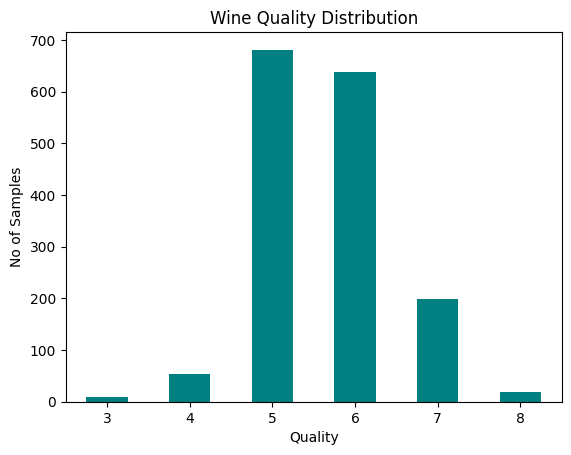

In [12]:
data["quality"].value_counts().sort_index().plot(kind="bar", color="teal") # Changed 'colr' to 'color'
plt.title("Wine Quality Distribution")
plt.xlabel("Quality")
plt.ylabel("No of Samples")
plt.xticks(rotation=0) #rotation means column name rotation. when we have word names as columns we can use rotation to get a nice plot
plt.show()

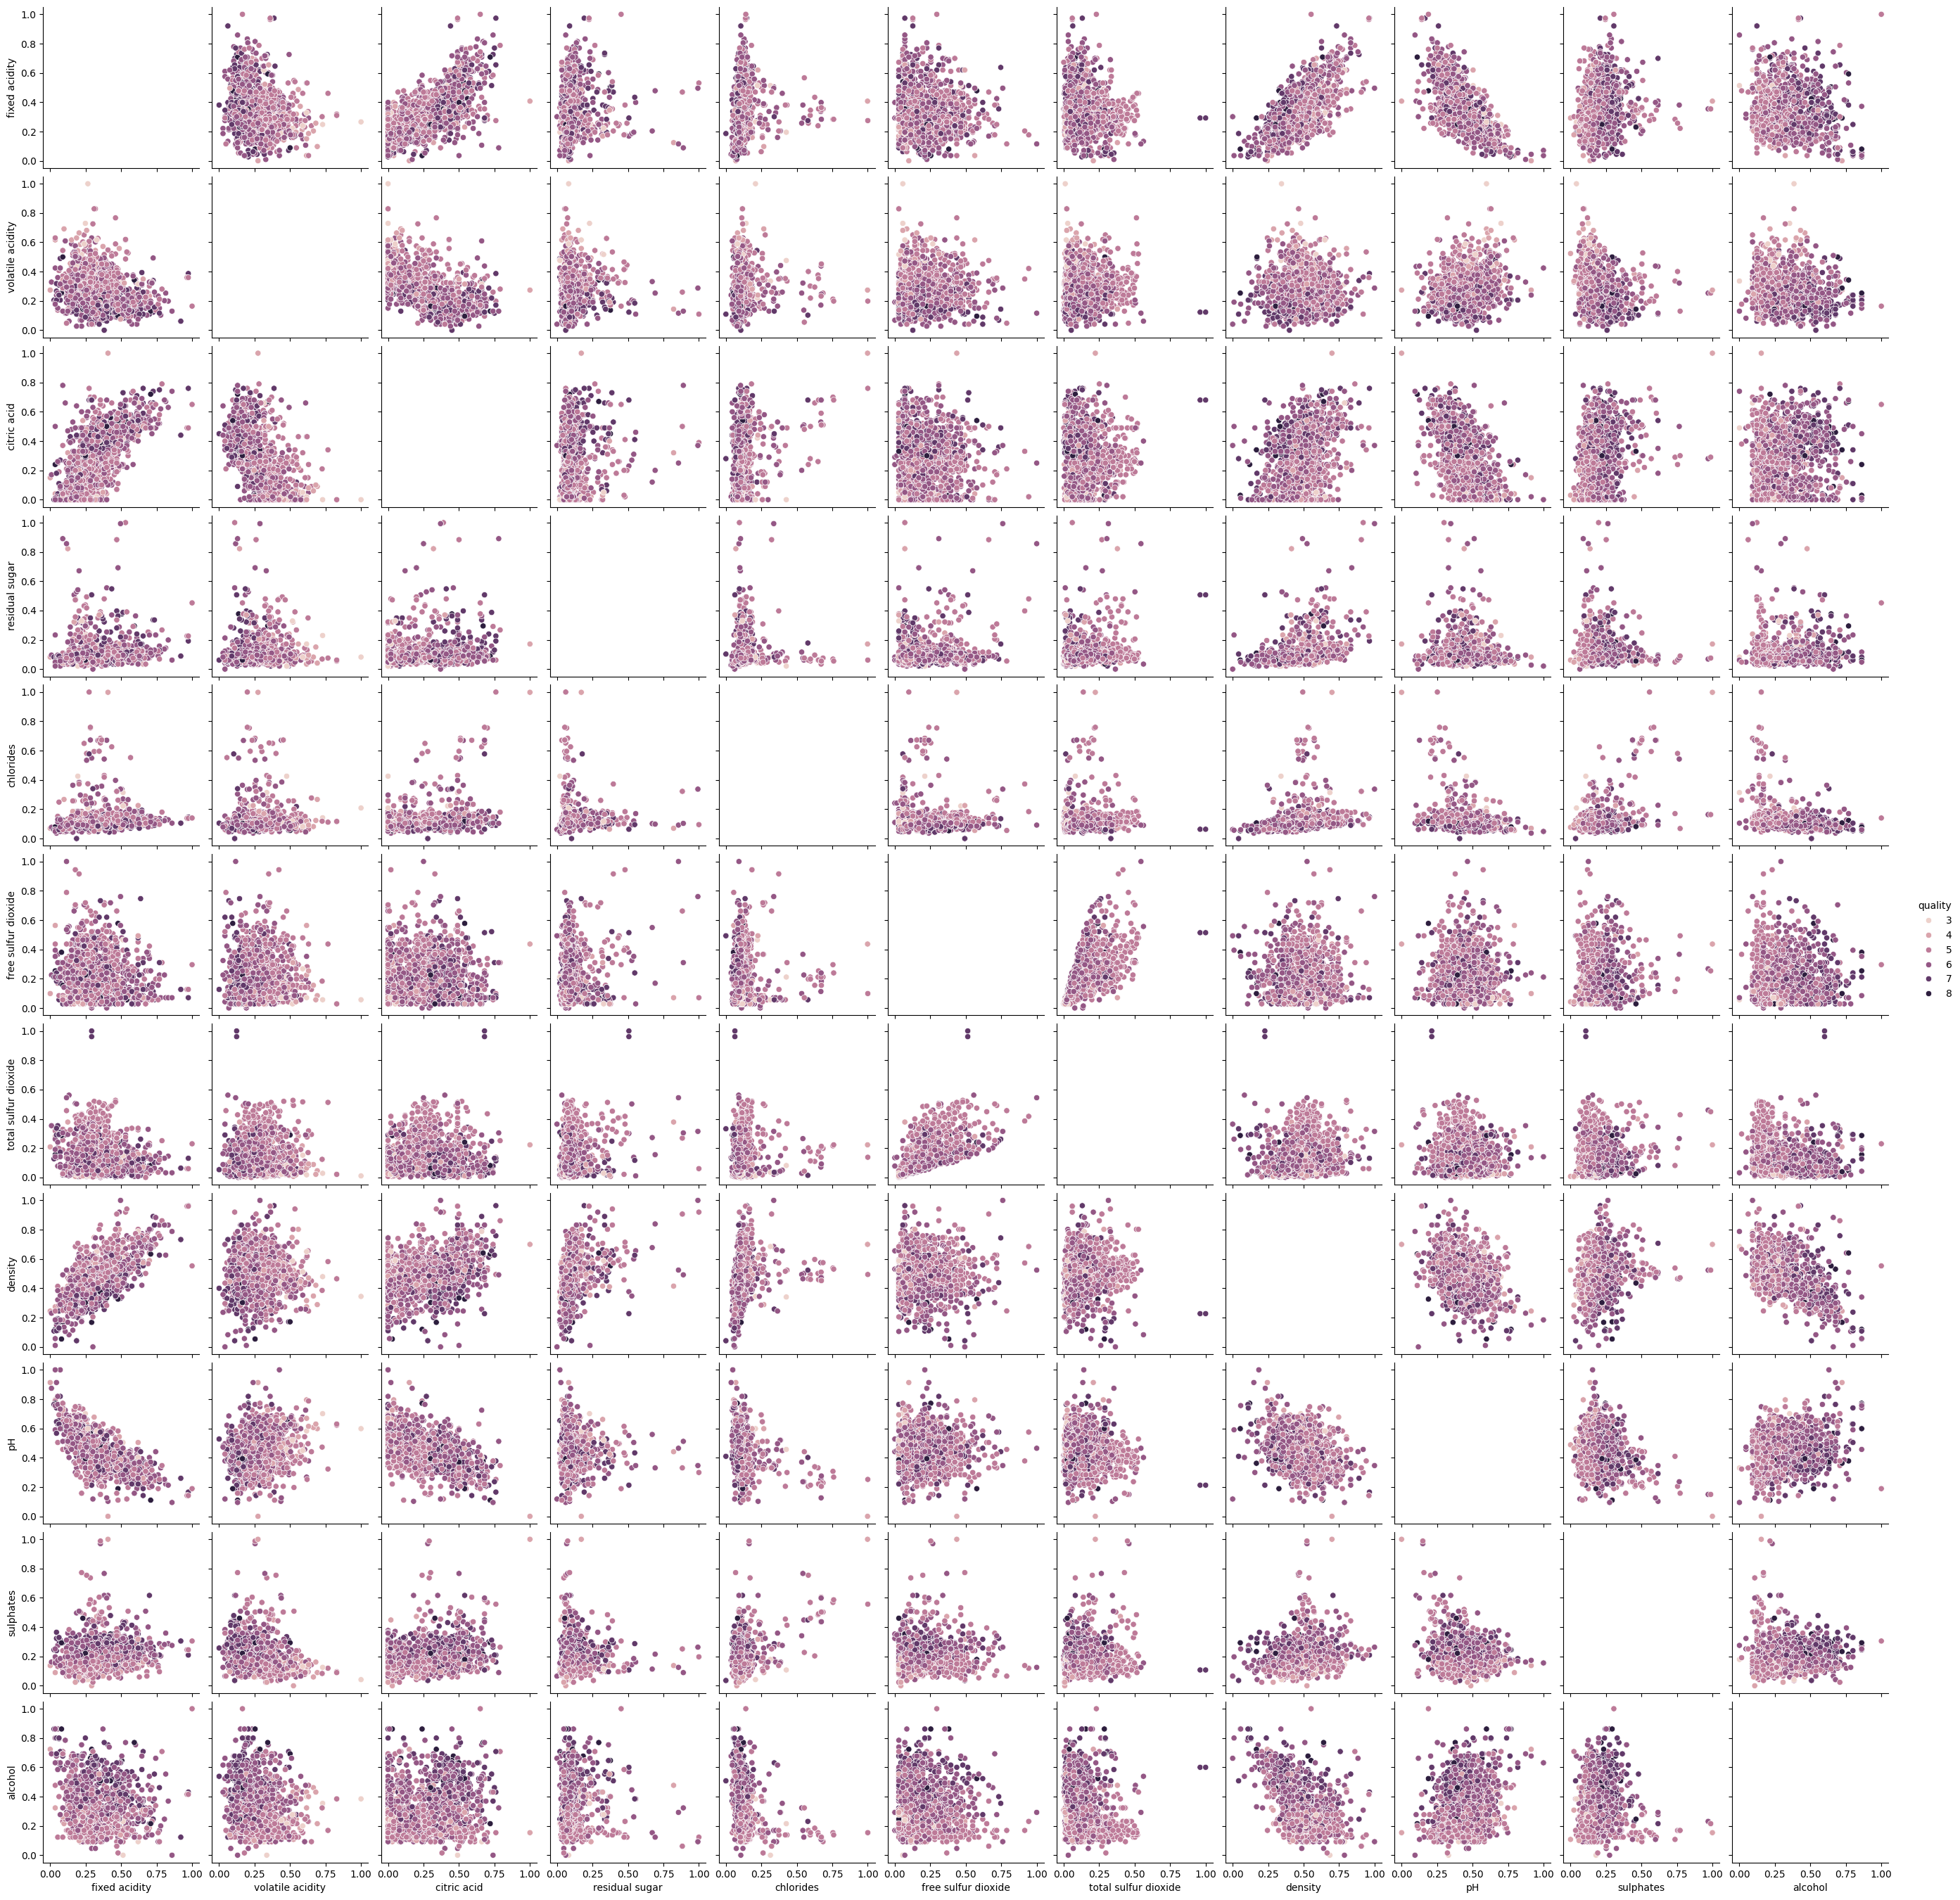

In [13]:
sns.pairplot(data,hue="quality", diag_kind='kde"') #kde means diagnol kind
plt.show()

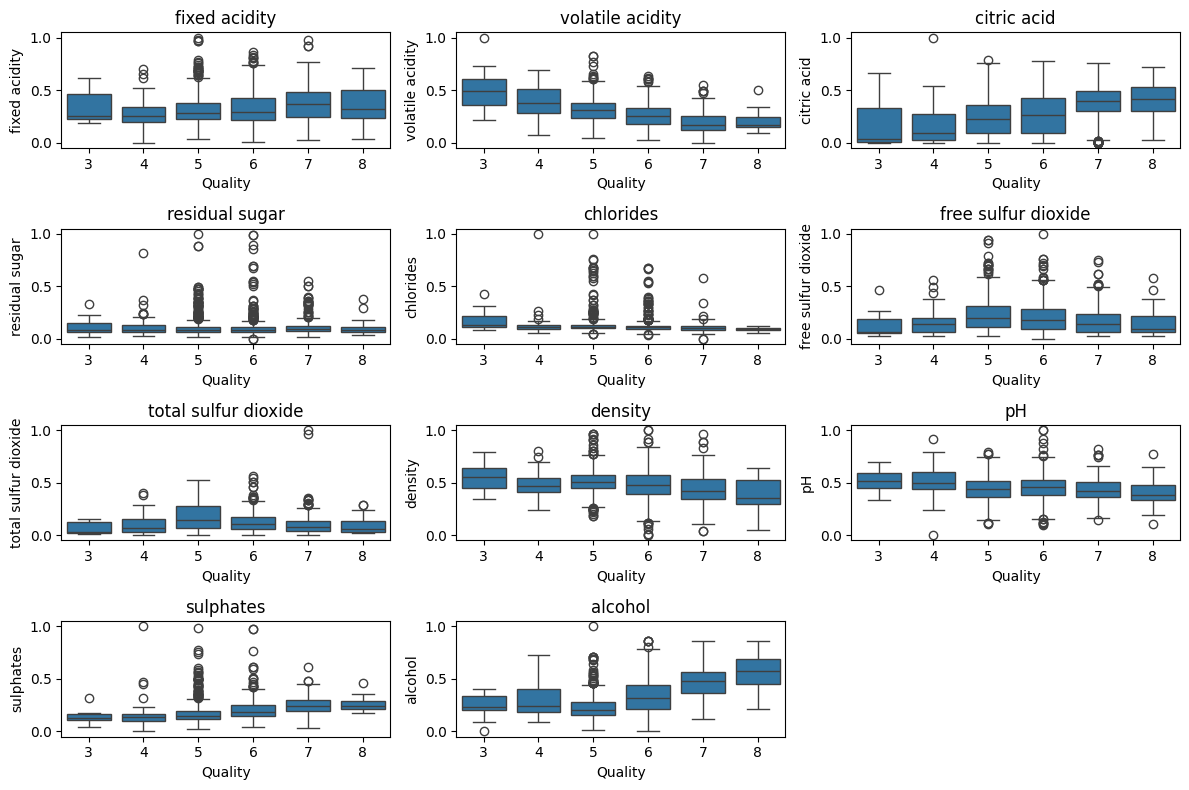

In [14]:
plt.figure(figsize=(12,8))
for i,col in enumerate (data.columns[:-1]): #Exclude 'quality' column
              plt.subplot(4,3,i+1)
              sns.boxplot(x=data["quality"],y=data[col])
              plt.title(col)
              plt.xlabel("Quality")
              plt.tight_layout()
plt.show()